# Linear Regression

Linear Regression is a supervised learning algorithm which is both a statistical and a machine learning algorithm. It is used to predict the real-valued output y based on the given input value x.

It depicts the relationship between the dependent variable y and the independent variables xi  ( or features ).  The hypothetical function used for prediction is represented by h( x ).

```
  h( x ) = w * x + b  
  
  here, b is the bias.
  x represents the feature vector
  w represents the weight vector.
```

Linear regression with one variable is also called univariant linear regression.  After initializing the weight vector, we can find the weight vector to best fit the model by ordinary least squares method or gradient descent learning.

### Loss Function
The cost function (or loss function) is used to measure the performance of a machine learning model or quantifies the error between the expected values and the values predicted by our hypothetical function. 
The cost function for Linear Regression is represented by J.

$$
\frac{1}{m} \sum_{i=1}^{m}(y^{(i)}-h(x^{(i)}))^2
$$
```
Here, m is the total number of training examples in the dataset.
y(i) represents the value of target variable for ith training example.
```

So, our objective is to minimize the cost function J (or improve the performance of our machine learning model). To do this, we have to find the weights at which J is minimum.  One such algorithm which can be used to minimize any differentiable function is Gradient Descent. It is a first-order iterative optimizing algorithm that takes us to a minimum of a function.

### Gradient descent
**Pseudo Code:**

1. Start with some w
2. Keep changing w to reduce J( w ) until we hopefully end up at a minimum.

**Algorithm:** 

```
repeat until convergence  {
       tmpi = wi - alpha * dwi          
       wi = tmpi              
}
where alpha is the learning rate.
```
### Implementation

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression as slr

# from sklearn.datasets import make_regression
# X, Y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=20)

In [13]:
# plt.scatter(X, Y)
# plt.show()

In [14]:
class LinearRegression:

    def __init__(self, iterations, learning_rate):
        self.iterations = iterations
        self.learning_rate = learning_rate

    def fit(self, X, Y):

        # m = training no. , n = features no.
        self.m , self.n = X.shape

        # Parameters Initialization
        self.W = np.zeros(self.n)
    
        # Bias
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.iterations):
            self.update_weights()
        return self

    def update_weights(self):
        #  Gradient Descent
        Y_pred = self.predict(self.X)

        #  Calculate Gradients 
        dW = - ( 2 * (self.X.T).dot(self.Y - Y_pred) ) / self.m
        db = - ( 2 * np.sum(self.Y - Y_pred) ) / self.m
        
        #  Update W
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        return self
    
    def predict(self, X):
        return X.dot(self.W) + self.b




### Importing Dataset

In [15]:
df = pd.read_csv("./dataset/salary_data.csv")
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
X.shape

(30, 1)

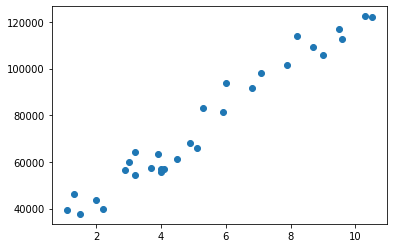

In [16]:
plt.scatter(X, Y)
plt.show()

### Spliting dataset to Train and Test set

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=1/3, random_state=0)

### Model Training

In [18]:
#  Our Model
model = LinearRegression(2000, 0.01)
model.fit(X_train, Y_train)

In [23]:
# Sklearn LinearRegression
slr_model = slr()
slr_model.fit(X_train, Y_train)


LinearRegression()

### Prediction on Test set

In [24]:
# Our Model
Y_pred = model.predict(X_test)

In [25]:
#  Sklearn
s_Y_pred = slr_model.predict(X_test)

In [20]:
print("Predicted Values:  ", np.round(Y_pred, 2))
print("Real Values:  ", Y_test)

print("Trained Weights:  ", np.round(model.W, 2))
print("Trained b:  ", np.round(model.b, 2))

Predicted Values:   [ 40831.98 123082.34  65133.22  63263.89 115605.03 108127.73 116539.69
  64198.56  76349.18 100650.42]
Real Values:   [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]
Trained Weights:   [9346.63]
Trained b:   26812.03


### Metrics

In [27]:
#  Our Model
np.sqrt(mean_squared_error(Y_test, Y_pred))


4584.897089907138

In [28]:
np.sqrt(mean_squared_error(Y_test, s_Y_pred))


4585.4157204675885

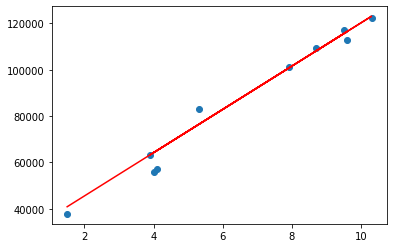

In [22]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color="red")
plt.show()

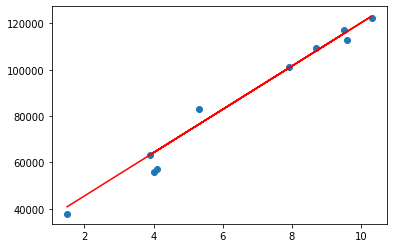

In [29]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, s_Y_pred, color="red")
plt.show()

## Tasks
    - dW
    - dynamic learning_rate

    - Multi-feature Model
    